# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We want to be able to create salary predictions of certain jobs based on the dataset provided that cointains info about job titles, distance from city, years of experience and other attritbutes. 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import inspect
import xgboost
import pickle

%matplotlib inline

#Author
__author__ = "Phil Baltazar"
__email__ = "phillusnow@gmail.com"
__website__ = "https://github.com/pbswe"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe

trainFeatDF = pd.read_csv('../Salary_Prediction_Portfolio/data/train_features.csv') 
trainSalsDF = pd.read_csv('../Salary_Prediction_Portfolio/data/train_salaries.csv')
testFeatDF = pd.read_csv('../Salary_Prediction_Portfolio/data/test_features.csv')

### ---- 3 Clean the data ----

In [4]:
# Briefly examine the data.

trainFeatDF.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
trainSalsDF.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [6]:
testFeatDF.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [7]:
print(trainFeatDF.shape)
print(testFeatDF.shape)
print(trainSalsDF.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


In [8]:
# Verify dtype and length of each dataset via .info() method.

In [9]:
trainFeatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
trainSalsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [11]:
testFeatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [12]:
# Identify numerical and categorical variables.

In [13]:
trainFeatDF.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [14]:
# So far we know:
# trainFeatDF has 8 columns: 2 of type "int64" and 6 of type "object".
# trainSalsDF has 2 columns: 1 of type "int64" and 1 of type "object".
# testFeatDF has 8 columns:  2 of type "int64" and 6 of type "object".

# Check for missing data and add "NaN" if any found. 

In [15]:
trainFeatDF.replace('?', np.nan, inplace=True)

In [16]:
trainSalsDF.replace('?', np.nan, inplace=True)

In [17]:
testFeatDF.replace('?', np.nan, inplace=True)

In [18]:
# Look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it.

In [19]:
trainFeatDF.duplicated().sum()

0

In [20]:
trainSalsDF.duplicated().sum()

0

In [21]:
testFeatDF.duplicated().sum()

0

In [22]:
# Separate both variable types and summarize them.

In [23]:
trainFeatDF.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [24]:
trainFeatDF.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684559324,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [25]:
numericCols = ['yearsExperience', 'milesFromMetropolis']

In [26]:
categoricCols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [27]:
# Merge both train_features and train_salaries into one dataframe. Delete the original DFs.

In [28]:
trainDF = pd.merge(trainFeatDF, trainSalsDF, on='jobId')

In [29]:
# Before deleting the original DFs, check that the new one is correct.
trainDF.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [30]:
# Deleting the previous DFs to save memory. 
del trainFeatDF
del trainSalsDF

In [31]:
trainDF['companyId'].value_counts()

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64

In [32]:
# Changing salary type to float, is a better representation for currency.

trainDF['salary'] = trainDF['salary'].astype(float)

trainDF.info()
trainDF['salary'].head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   jobId                1000000 non-null  object 
 1   companyId            1000000 non-null  object 
 2   jobType              1000000 non-null  object 
 3   degree               1000000 non-null  object 
 4   major                1000000 non-null  object 
 5   industry             1000000 non-null  object 
 6   yearsExperience      1000000 non-null  int64  
 7   milesFromMetropolis  1000000 non-null  int64  
 8   salary               1000000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 76.3+ MB


<bound method NDFrame.head of 0         130.0
1         101.0
2         137.0
3         142.0
4         163.0
          ...  
999995     88.0
999996    160.0
999997     64.0
999998    149.0
999999     88.0
Name: salary, Length: 1000000, dtype: float64>

### ---- 4 Explore the data (EDA) ----

Visualization of target variable (salary)

In [33]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

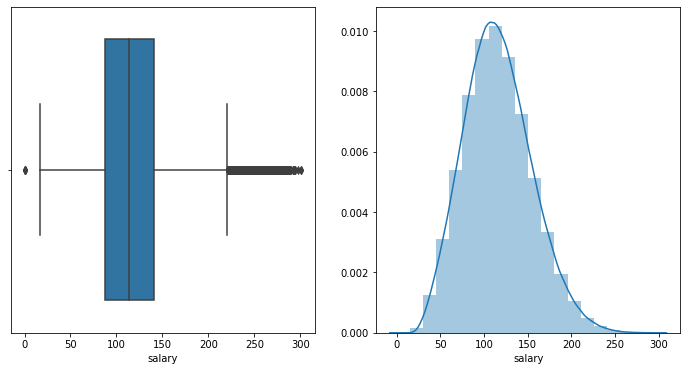

In [34]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(trainDF.salary)
plt.subplot(1, 2, 2)
sns.distplot(trainDF.salary, bins=20)
plt.show()

###### Use IQR rule to identify potential outliers

More on IQR at: https://medium.com/@TheNewStat1/interquartile-range-iqr-ad671d9476d4

In [35]:
stat = trainDF.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
print(IQR)
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for the suspected bounds are {} and {} respectively.'.format(upper, lower))


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
53.0
The upper and lower bounds for the suspected bounds are 220.5 and 8.5 respectively.


In [36]:
# Checking for potential outliers below the lower bound.
trainDF[trainDF.salary < 8.5]
trainDF.loc[trainDF.salary < lower]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0.0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0.0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0.0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0.0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0.0


In [37]:
trainDF.shape

(1000000, 9)

In [38]:
# Dropping these lower (zero) salaries since they don't add anything to our model.
trainDF = trainDF[trainDF['salary'] > lower]

In [39]:
# Check to see if rows above were dropped
trainDF.shape

(999995, 9)

In [40]:
# Checking for potential outliers above the upper bound. 

trainDF.loc[trainDF.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [41]:
# Checking for the most suspicious outliers above upper bound.

trainDF[(trainDF.salary > 222.5) & (trainDF.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225.0
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246.0
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225.0
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248.0
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223.0
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226.0
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226.0
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227.0
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230.0
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225.0


In [42]:
# Junior salaries over the 75% percentile are rare (16 out of 1mil), but they could occur. 
# Therefore, these outliers are acceptible. 

In [43]:
# Value_counts gives you how many features of a column from a variable of type object.
trainDF['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

In [44]:
# Visualize correlation between variables of type number.

trainDF[['yearsExperience', 'milesFromMetropolis', 'salary']].corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [45]:
# Function that creates plots to eplore the feature variables
def plotFeats(trainDF, var): 
    '''
    produce plot for each features
    plot1(left), the distribution of samples on the feature
    plot2(right), the dependance of salary on the feature
    '''
    plt.figure(figsize = (17, 4))
    plt.subplot(1, 2, 1)
    if trainDF[var].dtype == 'int64':
        plt.hist(trainDF[var], bins=5)
    else:
        # change the object datatype of each variable to category /n
        # type and order their level by the mean salary
        mean = trainDF.groupby(var)["salary"].mean()
        trainDF[var] = trainDF[var].astype('category')
        level = mean.sort_values().index.tolist()
        trainDF[var].cat.reorder_categories(level, inplace=True)
        trainDF[var].value_counts().plot(kind='bar')   
    plt.xticks(rotation=45, size=8)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    # There are many different companyIds so its better to visualize with a line graph
    if trainDF[var].dtype == 'int64' or var == "companyId": 
        # Plot the mean salary for each category and shade the line /n
        # between the (mean - std, mean + std)
        mean = trainDF.groupby(var)["salary"].mean()
        std = trainDF.groupby(var)["salary"].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, 
                         mean.values + std.values,alpha = 0.1)
    else:
        sns.boxplot(x= var, y="salary", data= trainDF)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salary')
    plt.show()

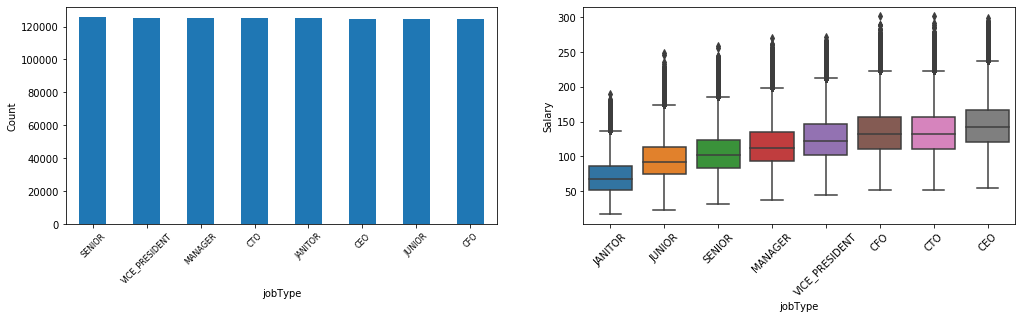

In [46]:
# The below code was used to sort and plot prior to completing the function above.

#sorted_list = trainDF.groupby('jobType')['salary'].median().sort_values(ascending=False).index
#boxPlotGraph = sns.boxplot(x="jobType", y="salary", data=trainDF, order=sorted_list)
#plt.xticks(rotation=60)
#plt.figure(figsize = (20, 20))

plotFeats(trainDF, 'jobType')

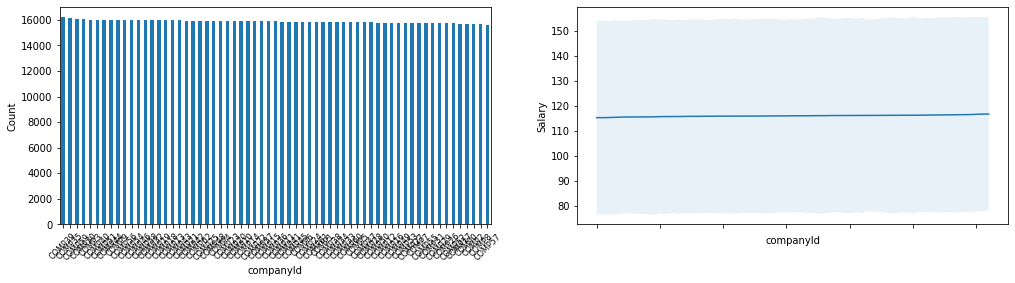

In [47]:
plotFeats(trainDF, 'companyId')

<Figure size 1440x1440 with 0 Axes>

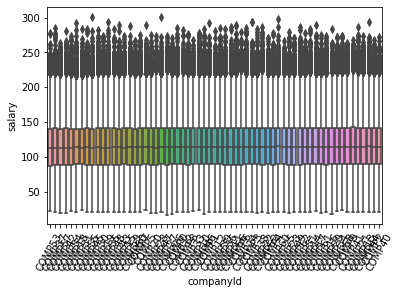

<Figure size 1440x1440 with 0 Axes>

In [48]:
# Company Id looks a bit cluttered, but it's still visible that it's a poor predictor of salary, /n
# since it shows a straight horizontal line across all features.
# Here's another companyId visualization.

boxPlotGraph = sns.boxplot(x="companyId", y="salary", data=trainDF, order=None)
plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

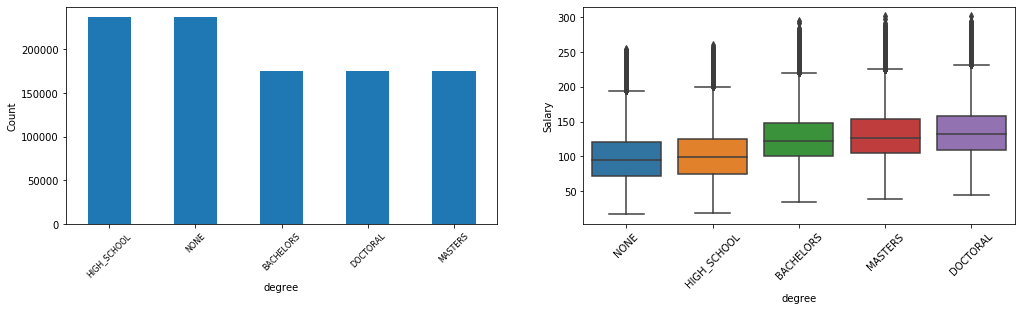

In [49]:
plotFeats(trainDF, 'degree')

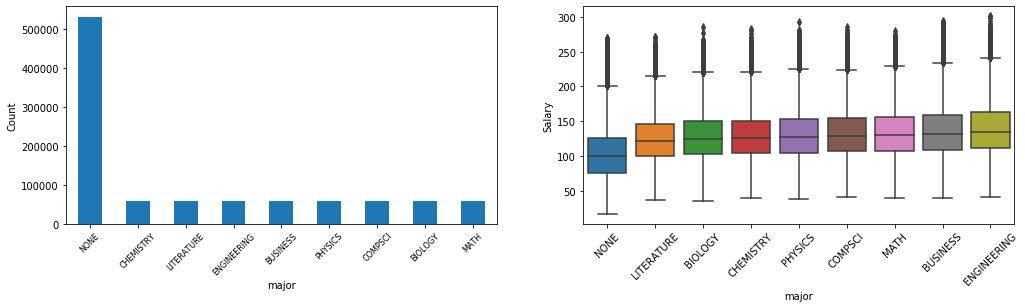

In [50]:
plotFeats(trainDF, 'major')

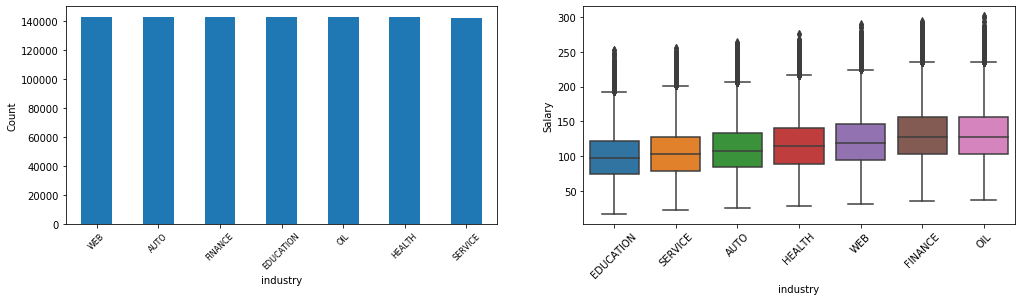

In [51]:
plotFeats(trainDF, 'industry')

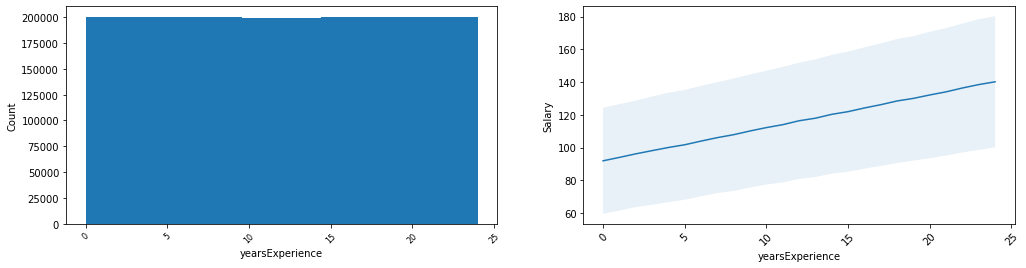

In [52]:
plotFeats(trainDF, 'yearsExperience')

<Figure size 1440x1440 with 0 Axes>

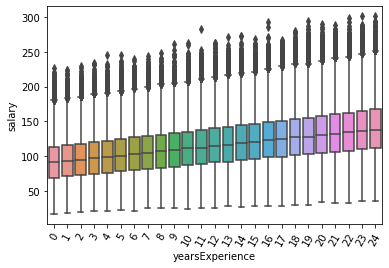

<Figure size 1440x1440 with 0 Axes>

In [53]:
# Years of experience has a nice, clear correlation with salary. /n
# It's a progressive line showing the higher the years of experience, the higher the salary.

boxPlotGraph = sns.boxplot(x="yearsExperience", y="salary", data=trainDF)
plt.xticks(rotation=60)
plt.figure(figsize = (20, 20))

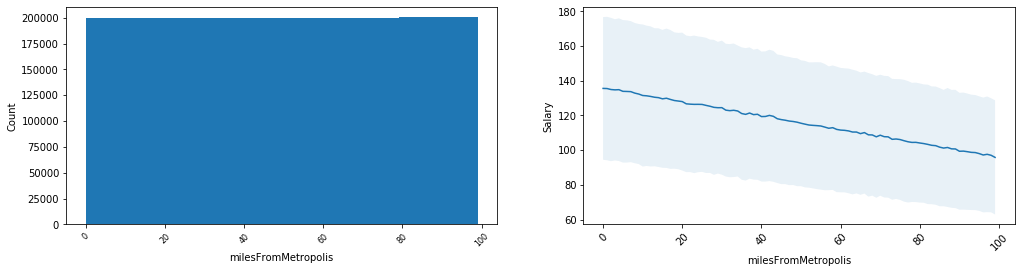

In [54]:
plotFeats(trainDF, 'milesFromMetropolis')

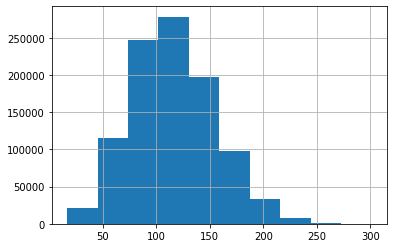

In [55]:
# Looks like the salary mean is around 100-105. 

trainDF.salary.hist() #add or remove ';' at the end for a small difference?

In [56]:
# Encoding categorical data in a dataframe.
def EncodeData(trainDF):    
    for col in trainDF.columns:
        if trainDF[col].dtype.name == 'category':
            le = LabelEncoder()
            trainDF[col] = le.fit_transform(trainDF[col])
    return trainDF

In [57]:
# Create copy of dataframe and encode the categorical data.
baselineDF = trainDF.copy()
baselineDF = EncodeData(baselineDF)

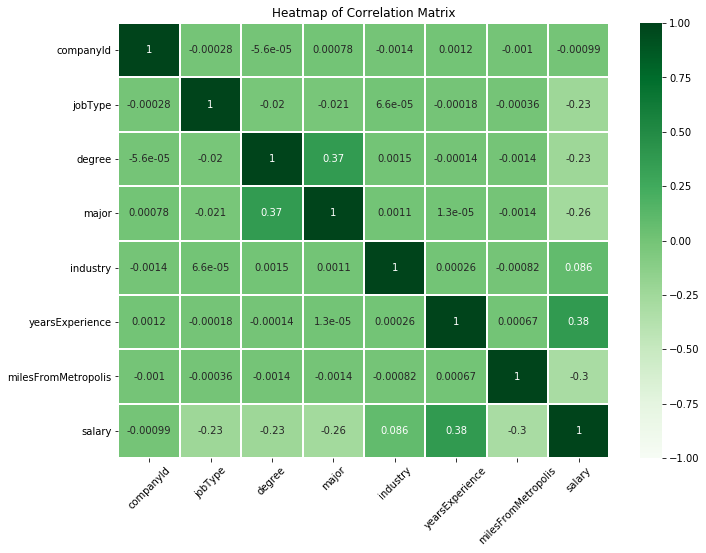

In [58]:
# Plot Seaborn heatmap to visualize correlation between variables.
plt.figure(figsize = (11, 8))
corr = baselineDF.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,cmap = "Greens", vmin=-1, vmax=1, annot=True, linewidths=1)
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

###### Based on the plotted heatmap, the strongest correlators are YoE and miles from metropolis.
<br>
We also see no collinearity between features, as well as companyId having near zero correlation with salary, so we could consider dropping it after the baseline model executes.

### ---- 5 Establish a baseline ----

In [59]:
#select a reasonable metric (MSE in this case)
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [60]:
baselineDF.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [61]:
# Splitting features and targets
featuresBaseline = baselineDF[['companyId', 'jobType', 'degree', 'major', 'industry',
                            'yearsExperience', 'milesFromMetropolis', 'salary']]
targetsBaseline = baselineDF[['salary']]
# (optional)
# del baselineDF

In [62]:
# Creating an extremely simple model and measure its efficacy.
lr = LinearRegression()
baselineLR_mse = cross_val_score(lr, featuresBaseline, targetsBaseline, scoring 
                                  = 'neg_mean_squared_error')
baselineLR_mse = -1*baselineLR_mse.mean()
print("Baseline MSE Score: ", baselineLR_mse)

#'''In this case, MSE (mean squared error) is the best metric to measure the efficacy /n
#    because the prediction here is on salaries, which are numerical in nature. '''
# groupy for each industry and get the error from that. 
# Write MSE algorithm? Not here. See Part 3 - Develop. 

Baseline MSE Score:  2.4414598688574975e-26


### ---- 6 Hypothesize solution ----

In [63]:
# Brainstorming 3 models that may improve results over the baseline model.

In [64]:
''' Choose about 3 models based on the EDA that you think will be effective. '''

' Choose about 3 models based on the EDA that you think will be effective. '

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [65]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [66]:
# One hot encoding, create new features if needed. Tune models as shown below.

categoryDF = trainDF[['jobType', 'degree', 'major', 'industry']]
categoryDF = pd.get_dummies(categoryDF, drop_first=True)

In [67]:
categoryDF.shape

(999995, 25)

In [68]:
# Normalizing values between 0 and 1 using Min/Max Scaler.

normalDF = trainDF[['yearsExperience', 'milesFromMetropolis']]
cols = normalDF.columns
normalDF = MinMaxScaler().fit_transform(normalDF)
normalDF = pd.DataFrame(normalDF, columns = cols)

In [69]:
# Merging (concat) the converted categorical and numerical variables.

featuresDF = pd.concat([categoryDF.reset_index(drop=True), normalDF], axis=1)
targetsDF = trainDF[['salary']]
#del categoryDF, normalDF

In [70]:
featuresDF.shape

(999995, 27)

### ---- 8 Create models ----

In [71]:
#create and tune the models that you brainstormed during part 2

In [72]:
# Utilizing 5 Fold - Cross Validation (CV) of each model.

def evalModel(model):
    negMse = cross_val_score(model, featuresDF, targetsDF.values.ravel(), scoring
                            = 'neg_mean_squared_error')
    mse = -1 * negMse
    stdMse = round(mse.std(), 2)
    meanMse = round(mse.mean(), 2)
    print('\nModel:\n', model)
    print('    Standard Deviation of Cross Validation MSEs:\n     ', stdMse)
    print('    Mean 5-Fold Cross Validation MSE: \n      ', meanMse)
    return meanMse

###### Warning.

###### Warning!

###### WARNING!

Self-reminder: the cell below takes approximately 1 hour to run. Make sure to save this notebook and push/commit to Git for version control as a precautionary step.

In [77]:
# Looping through different models to obtain their MSE. Hyperparameters chosen manually (testing).

models = []
meanMse = {}

lr = LinearRegression()

sgd = SGDRegressor(max_iter=200, learning_rate='optimal')

dtr = DecisionTreeRegressor(max_depth=15)

rfr = RandomForestRegressor(n_estimators=150, n_jobs=-1, max_depth=30, 
                            min_samples_split=60, max_features='sqrt')
xgb = xgboost.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)

models.extend([lr, sgd, dtr, rfr, xgb])

print('Cross Validation of Models Initiated...\n')

for model in models:
    mseIter = evalModel(model)
    meanMse.update({model:mseIter})
    
bestModel = min(meanMse, key=meanMse.get)

print('\n\nThe model with the lowest average MSE to use for predictions is:\n')
print(bestModel)

Cross Validation of Models Initiated...


Model:
 LinearRegression()
    Standard Deviation of Cross Validation MSEs:
      1.78
    Mean 5-Fold Cross Validation MSE: 
       384.41

Model:
 SGDRegressor(learning_rate='optimal', max_iter=200)
    Standard Deviation of Cross Validation MSEs:
      1.75
    Mean 5-Fold Cross Validation MSE: 
       384.54

Model:
 DecisionTreeRegressor(max_depth=15)
    Standard Deviation of Cross Validation MSEs:
      1.96
    Mean 5-Fold Cross Validation MSE: 
       433.13

Model:
 RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=60,
                      n_estimators=150, n_jobs=-1)
    Standard Deviation of Cross Validation MSEs:
      1.75
    Mean 5-Fold Cross Validation MSE: 
       372.2

Model:
 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
       

In [79]:
# Creating a pandas dataframe from the meanMse dictionary.
modelsDF = pd.DataFrame.from_dict(data = meanMse, orient='index', columns=['MSE-Score'])
modelsDF.index = ['LR', 'SDG', 'DTR', 'RF', 'XGB']
modelsDF

,MSE-Score
LR,384.41
SDG,384.54
DTR,433.13
RF,372.20
XGB,356.62


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

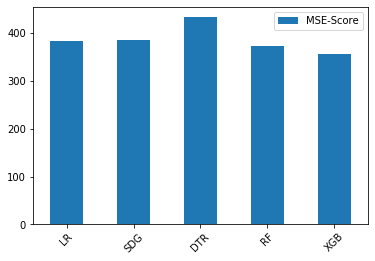

In [91]:
# Visualizing the accuracy results.
modelsDF.plot(kind='bar')
plt.xticks(rotation=45)

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data

In [8]:
conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    backports.functools_lru_cache-1.6.1|     pyhd3eb1b0_0          12 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    conda-4.9.2                |   py38hecd8cb5_0         2.9 MB
    conda-package-handling-1.7.2|   py38h22f3db7_0         1.5 MB
    ------------------------------------------------------------
                                           Total:         4.4 MB

The following packages will be UPDATED:

  conda-package-han~                   1.6.1-py38h1de35cc_0 --> 1.7.2-py38h22f3db7_0

The following packages will be SUPERSEDED by a higher-priority channel:

  _py-xgboost-mutex                             conda-fo

In [6]:
conda install -c conda-forge xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Applications/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    libxgboost-1.1.1           |       h4a8c4bd_0         1.9 MB  conda-forge
    py-xgboost-1.1.1           |   py38h32f6830_0         1.0 MB  conda-forge
    python_abi-3.8             | 